In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [ ]:
# Pivot table is a way to summarize and restructure data in a dataframe. its like groupby. but also lets reorganize into a table format
# (we create one with: df.pivot_table(
#    values='...', 
#   index='...', 
#  columns='...', 
#   aggfunc='...'
#   )


In [35]:
df_job_country_salary= df.pivot_table(
    values='salary_year_avg',
    index='job_country',
    columns= 'job_title_short',
    aggfunc='median'
)
df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [ ]:
top_jobs = (
    df.pivot_table(
        values='salary_year_avg',
        index='job_title_short',
        aggfunc='median'
    )
    .sort_values('salary_year_avg', ascending=False)
    .head(3)
)
top_jobs


,salary_year_avg
job_title_short,
Senior Data Scientist,154206.292996
Senior Data Engineer,145840.611624
Data Scientist,135988.837171


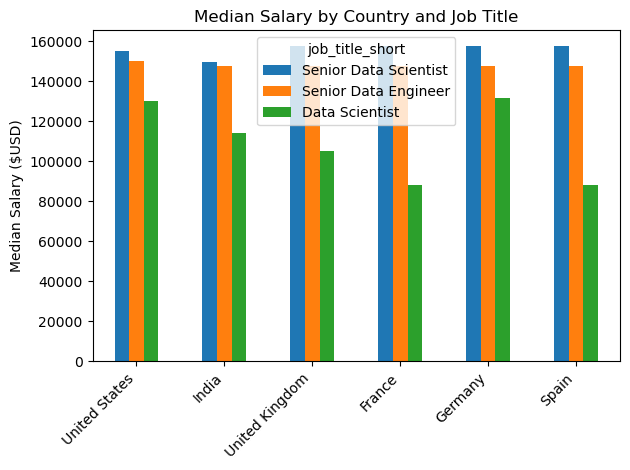

<Figure size 1400x600 with 0 Axes>

In [41]:
top_countries = df['job_country'].value_counts().head(6).index

# filter df_job_country_salry for top 6 countries
df_job_country_salary = df_job_country_salary.loc[top_countries]

# filter df_job_country_salary for list of 3 job titles
job_title = ['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist']

df_job_country_salary = df_job_country_salary[job_title]

df_job_country_salary.plot(kind='bar')

plt.ylabel('Median Salary ($USD)')
plt.xlabel('')
plt.title('Median Salary by Country and Job Title')  
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.figure(figsize=(14,6))
plt.show()
